In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\pujay\Downloads\archive\tripadvisor_hotel_reviews.csv")
df.head()
#step 1
##Data preprocessing


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [2]:
##remove noise
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pujay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def clean_text(text):
    # Convert text to lower case
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Optionally, remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text


In [4]:
import numpy as np

def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['Sentiment'] = df['Rating'].apply(create_sentiment)

In [5]:
df.head()

,Review,Rating,Sentiment
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,-1
2,nice rooms not 4* experience hotel monaco seat...,3,0
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1


In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')



# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply the preprocessing function to the 'Review' column
df['Processed_Review'] = df['Review'].apply(preprocess_text)

# Display the first few rows of the dataset with the processed text
print(df[['Review', 'Processed_Review']].head())





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pujay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pujay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pujay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pujay\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                    Processed_Review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room 4 experience hotel monaco seattle go...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  


In [7]:
from collections import Counter
import re
import pandas as pd

# Function to preprocess text (remove punctuation, convert to lowercase)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Read the CSV file using pandas
file_path = r"C:\Users\pujay\Downloads\archive\tripadvisor_hotel_reviews.csv"
df = pd.read_csv(file_path)

# Concatenate all reviews into a single string
text = ' '.join(df['Review'])

# Preprocess the text
text = preprocess_text(text)

# Tokenize the text
words = text.split()

# Count frequencies of each word
word_freq = Counter(words)




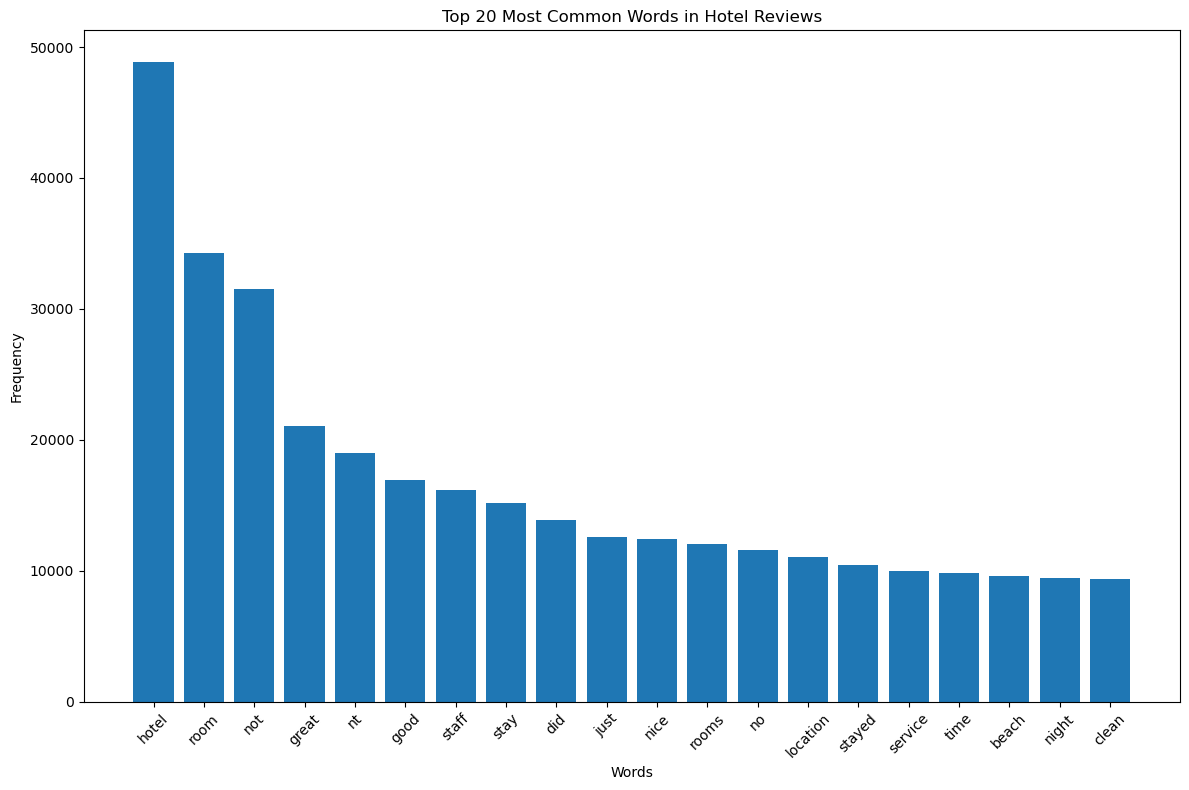

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the most common words
most_common_words = word_freq.most_common(20)  # Change 20 to show more or fewer words
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(12, 8))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Hotel Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.feature_extraction.text import re

def clean_data(text):
    
    no_punc = re.sub(r'[^\w\s]', '', review)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])
    
    return(no_digits)
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [10]:
##Feature extraction

import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    processed_text = ' '.join(tokens)
    
    return processed_text



# Apply the preprocessing function to the 'Review' column
df['Processed_Review'] = df['Review'].apply(preprocess_text)

# Display the first few rows of the dataset with the processed text
print(df[['Review', 'Processed_Review']].head())

# Vectorization using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed_Review'])

# Convert to DataFrame for better visualization
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
print(df_bow)




                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                    Processed_Review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice room 4 experience hotel monaco seattle go...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  
       00  000  0000  0001  000rp  0030  004  005  01  0102where  ...  zurich  \
0       0    0     0     0      0     0    0    0   0          0  ...       0   
1       0    0     0     0      0     0    0    0   0          0  ...       0   
2       0    0     0     0      0     0    0    0   0          0  ...       0   
3       0

In [11]:
##decision tree

In [12]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error, r2_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Load the dataset
file_path = r"C:\Users\pujay\Downloads\archive\tripadvisor_hotel_reviews.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Apply the preprocessing function to the 'Review' column
df['Processed_Review'] = df['Review'].apply(preprocess_text)

# Vectorization using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Review'])

# For simplicity, let's assume a binary classification for positive and negative reviews
# Here, we'll consider ratings >= 4 as positive (label 1) and < 4 as negative (label 0)
df['Label'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)
y = df['Label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5
Accuracy: 0.7738472798243474
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      1057
           1       0.85      0.85      0.85      3042

    accuracy                           0.77      4099
   macro avg       0.70      0.70      0.70      4099
weighted avg       0.77      0.77      0.77      4099

Mean Squared Error: 0.2261527201756526
R-squared: -0.18174413462238204


In [13]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import joblib  # Import joblib for saving the model

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Load the dataset
file_path = r"C:\Users\pujay\Downloads\archive\tripadvisor_hotel_reviews.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Apply the preprocessing function to the 'Review' column
df['Processed_Review'] = df['Review'].apply(preprocess_text)

# Vectorization using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Review'])

# For simplicity, let's assume a binary classification for positive and negative reviews
# Here, we'll consider ratings >= 4 as positive (label 1) and < 4 as negative (label 0)
df['Label'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)
y = df['Label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression classifier
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

# Save the model
model_path = 'logistic_regression_model.pkl'
joblib.dump(clf, model_path)
print(f'Model saved to {model_path}')



# Save the vectorizer
vectorizer_path = 'tfidf_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_path)
print(f'Vectorizer saved to {vectorizer_path}')

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5
Model saved to logistic_regression_model.pkl
Vectorizer saved to tfidf_vectorizer.pkl
Accuracy: 0.902659185167114
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.79      1057
           1       0.91      0.97      0.94      3042

    accuracy                           0.90      4099
   macro avg       0.90      0.84      0.86      4099
weighted avg       0.90      0.90      0.90      4099

Mean Squared Error: 0.09734081483288606
R-squared: 0.4913528482046058


In [14]:
##Random forest
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Removing punctuation and special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Load the dataset
file_path = r"C:\Users\pujay\Downloads\archive\tripadvisor_hotel_reviews.csv"
df = pd.read_csv(file_path)

# Apply the preprocessing function to the 'Review' column
df['Review'] = df['Review'].apply(preprocess_text)

# Create sentiment labels
df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x > 3 else 'negative')

# Split data into features (X) and target (y)
X = df['Review']
y = df['Sentiment']

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform text data into TF-IDF features
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Accuracy: 0.83
              precision    recall  f1-score   support

    negative       0.98      0.35      0.52      1057
    positive       0.82      1.00      0.90      3042

    accuracy                           0.83      4099
   macro avg       0.90      0.67      0.71      4099
weighted avg       0.86      0.83      0.80      4099



ValueError: could not convert string to float: 'negative'

In [15]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



# Apply the preprocessing function to the 'Review' column
df['Processed_Review'] = df['Review'].apply(preprocess_text)

# Vectorization using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Review'])

# Use 'Rating' as the target variable for regression
y = df['Rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))



Accuracy: 0.51
              precision    recall  f1-score   support

           1       0.83      0.33      0.47       292
           2       0.47      0.03      0.05       333
           3       0.38      0.01      0.01       432
           4       0.42      0.23      0.29      1252
           5       0.52      0.96      0.68      1790

    accuracy                           0.51      4099
   macro avg       0.52      0.31      0.30      4099
weighted avg       0.49      0.51      0.42      4099



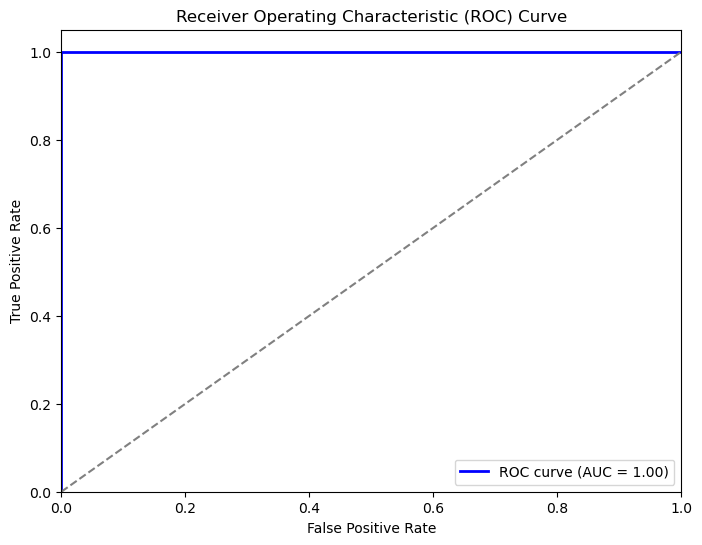

In [16]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Apply the preprocessing function to the 'Review' column
df['Processed_Review'] = df['Review'].apply(preprocess_text)

# Vectorization using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Review'])

# For simplicity, let's assume a binary classification for positive and negative reviews
# Here, we'll consider ratings >= 4 as positive (label 1) and < 4 as negative (label 0)
df['Label'] = df['Rating'].apply(lambda x: 1 if x >= 4 else 0)
y = df['Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

# Fit the model
classifier.fit(X, y)

# Predict probabilities of the positive class (class 1)
y_scores = classifier.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()









In [17]:
### handling missing data

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [18]:

!pip install vaderSentiment


     -------------------------------------- 126.0/126.0 kB 1.5 MB/s eta 0:00:00


In [19]:

# Install vaderSentiment if not installed: pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Sample text for analysis
text = "nice hotel expensive parking got good deal stay hotel anniversary"

# Analyze sentiment
scores = analyzer.polarity_scores(text)

# Output sentiment scores
print(f"Sentiment Scores: {scores}")

# Classification based on compound score
if scores['compound'] >= 0.05:
    sentiment = "Positive"
elif scores['compound'] <= -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"Sentiment: {sentiment}")


Sentiment Scores: {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'compound': 0.6908}
Sentiment: Positive


                                              review       date  \
0  nice hotel expensive parking got good deal sta... 2023-01-01   
1  arrived late evening took advice previous revi... 2023-01-02   
2  check quick easy, little disappointed non-exis... 2023-01-03   
3       bed comfortable woke stiff neck high pillows 2023-01-04   
4  not soundproof like heard music room night mor... 2023-01-05   
5  maybe just noisy neighbors, aveda bath product... 2023-01-06   
6  did not goldfish stay nice touch taken advanta... 2023-01-07   
7          location great walking distance shopping. 2023-01-08   

   sentiment_score sentiment  
0           0.6908  positive  
1           0.0000   neutral  
2           0.6801  positive  
3           0.5106  positive  
4          -0.2755  negative  
5           0.2732  positive  
6          -0.0854  negative  
7           0.6249  positive  


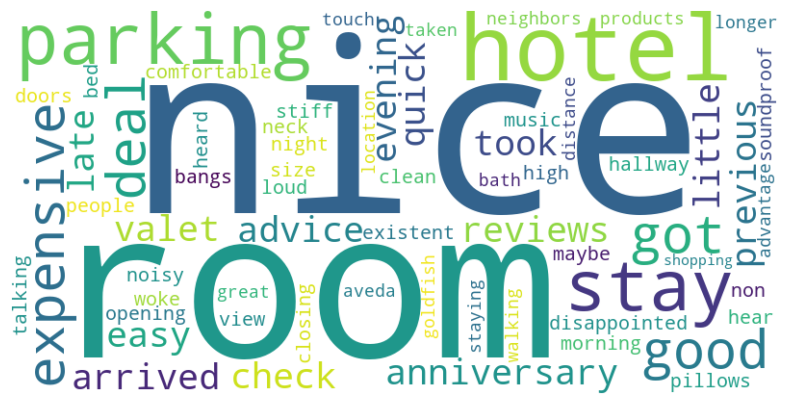

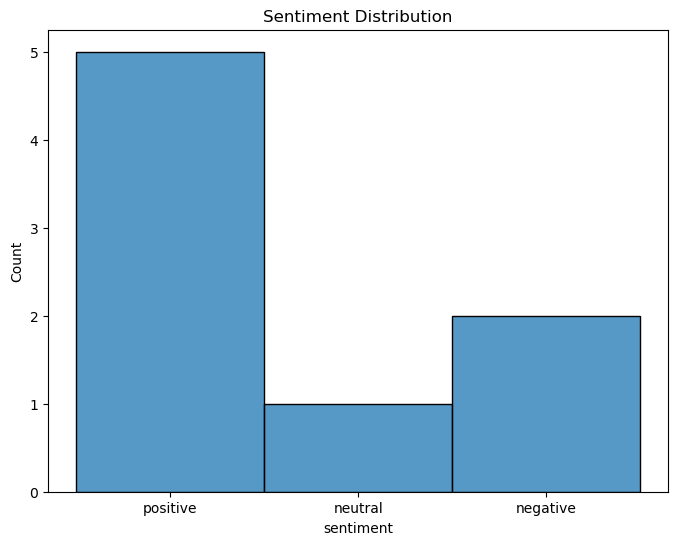

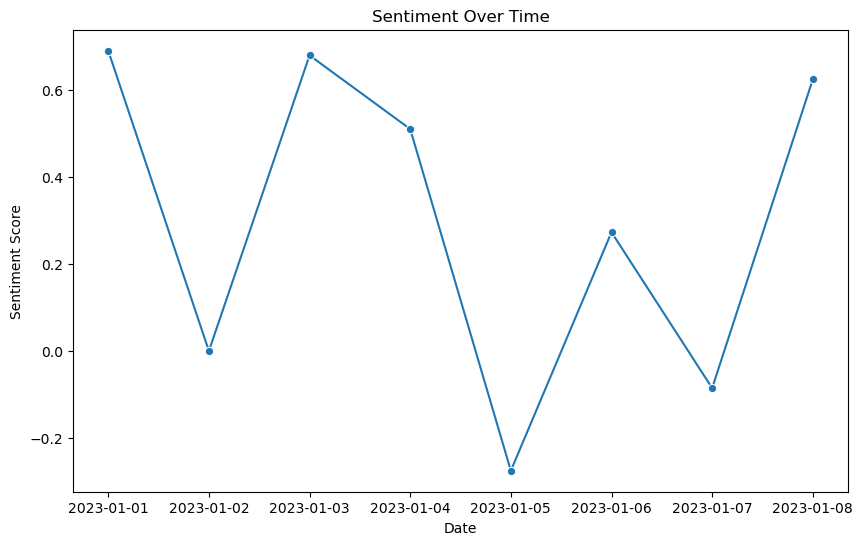

Sentiment Distribution:
 positive    5
negative    2
neutral     1
Name: sentiment, dtype: int64

Average Sentiment Score Over Time:
 date
2023-01-01    0.6908
2023-01-02    0.0000
2023-01-03    0.6801
2023-01-04    0.5106
2023-01-05   -0.2755
2023-01-06    0.2732
2023-01-07   -0.0854
2023-01-08    0.6249
Name: sentiment_score, dtype: float64

Positive Sentiment Trend:
 date
2023-01-01    1
2023-01-03    1
2023-01-04    1
2023-01-06    1
2023-01-08    1
dtype: int64

Negative Sentiment Trend:
 date
2023-01-05    1
2023-01-07    1
dtype: int64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Sample Data (for demonstration purposes)
data = {
    'review': [
       "nice hotel expensive parking got good deal stay hotel anniversary",
        "arrived late evening took advice previous reviews did valet parking", 
        "check quick easy, little disappointed non-existent view room room clean nice size",
        "bed comfortable woke stiff neck high pillows",
        "not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway",
        "maybe just noisy neighbors, aveda bath products nice", 
        "did not goldfish stay nice touch taken advantage staying longer",
        "location great walking distance shopping."
    ],
    'date': pd.date_range(start="2023-01-01", periods=8, freq='D')
}

df = pd.DataFrame(data)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment for each review
df['sentiment_score'] = df['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Categorize sentiment based on compound score
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

# Display the dataframe with sentiment
print(df)

# -------------------------
# Step 6: Visualization
# -------------------------

# 1. Word Cloud
def plot_wordcloud(text):
    # Add STOPWORDS to remove common words like 'the', 'and', 'is', etc.
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Combine all reviews into one text for word cloud
combined_text = ' '.join(df['review'].values)
plot_wordcloud(combined_text)

# 2. Sentiment Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['sentiment'], discrete=True)
plt.title('Sentiment Distribution')
plt.show()

# 3. Time-Series Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='sentiment_score', data=df, marker='o')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()

# -------------------------
# Step 7: Result Interpretation and Insights Extraction
# -------------------------

# Insight 1: Count of Positive, Neutral, Negative Sentiments
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:\n", sentiment_counts)

# Insight 2: Average Sentiment Score Over Time
avg_sentiment_score = df.groupby('date')['sentiment_score'].mean()
print("\nAverage Sentiment Score Over Time:\n", avg_sentiment_score)

# Insight 3: Sentiment Trend
positive_trend = df[df['sentiment'] == 'positive'].groupby('date').size()
negative_trend = df[df['sentiment'] == 'negative'].groupby('date').size()

print("\nPositive Sentiment Trend:\n", positive_trend)
print("\nNegative Sentiment Trend:\n", negative_trend)
